In [89]:
!pip install seaborn
!pip install wordcloud
!pip install textblob

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\pavin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\numpy\\distutils\\system_info.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
DATA_DIR = os.path.join(BASE_DIR, "datasets")
train_path = os.path.join(DATA_DIR, "train.csv")
test_path = os.path.join(DATA_DIR, "test.csv")
# Load the dataset (change 'your_dataset.csv' to the actual file path)
train_df = pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

In [91]:

# 1. Data Overview
# Check the total number of rows and columns, column names, and data types
print("Dataset Overview:")
print("Number of rows:", train_df.shape[0])
print("Number of columns:", train_df.shape[1])
print("\nColumn Names and Data Types:")
print(train_df.dtypes)

# Display the first few rows
print("\nSample Data:")
print(train_df.head())

Dataset Overview:
Number of rows: 93686
Number of columns: 3

Column Names and Data Types:
category              object
sub_category          object
crimeaditionalinfo    object
dtype: object

Sample Data:
                                category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

                                  crimeaditionalinfo  
0  I had continue received random calls and abusi...  
1  The above fraudster is continuously messaging ...  
2  He is acting like a police and demanding for m...  
3  In apna Job I have applied for job interview f...  
4  I received a call from lady stating that 

In [92]:
# 2. Checking for Missing Values
print("\nMissing Values in Each Column:")
print(train_df.isnull().sum())



Missing Values in Each Column:
category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64



Category Distribution:
category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64


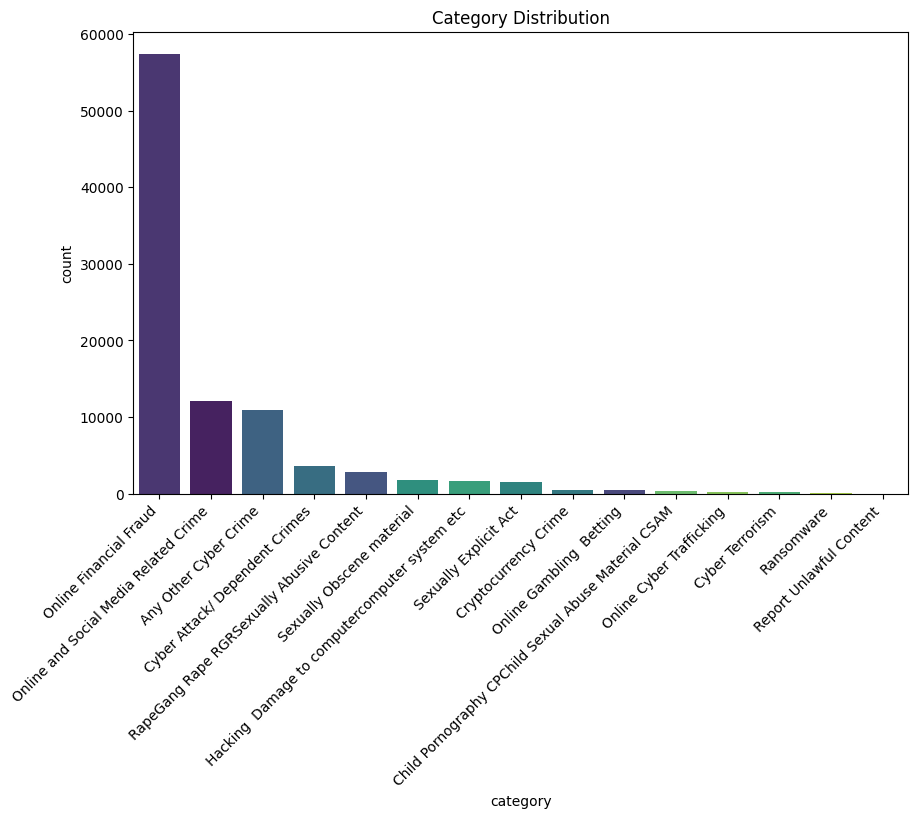


Subcategory Distribution:
sub_category
UPI Related Frauds                                                      26856
Other                                                                   10878
DebitCredit Card FraudSim Swap Fraud                                    10805
Internet Banking Related Fraud                                           8872
Fraud CallVishing                                                        5803
Cyber Bullying  Stalking  Sexting                                        4089
EWallet Related Fraud                                                    4047
FakeImpersonating Profile                                                2299
Profile Hacking Identity Theft                                           2073
Cheating by Impersonation                                                1988
Unauthorised AccessData Breach                                           1114
Online Job Fraud                                                          912
DematDepository Fraud   

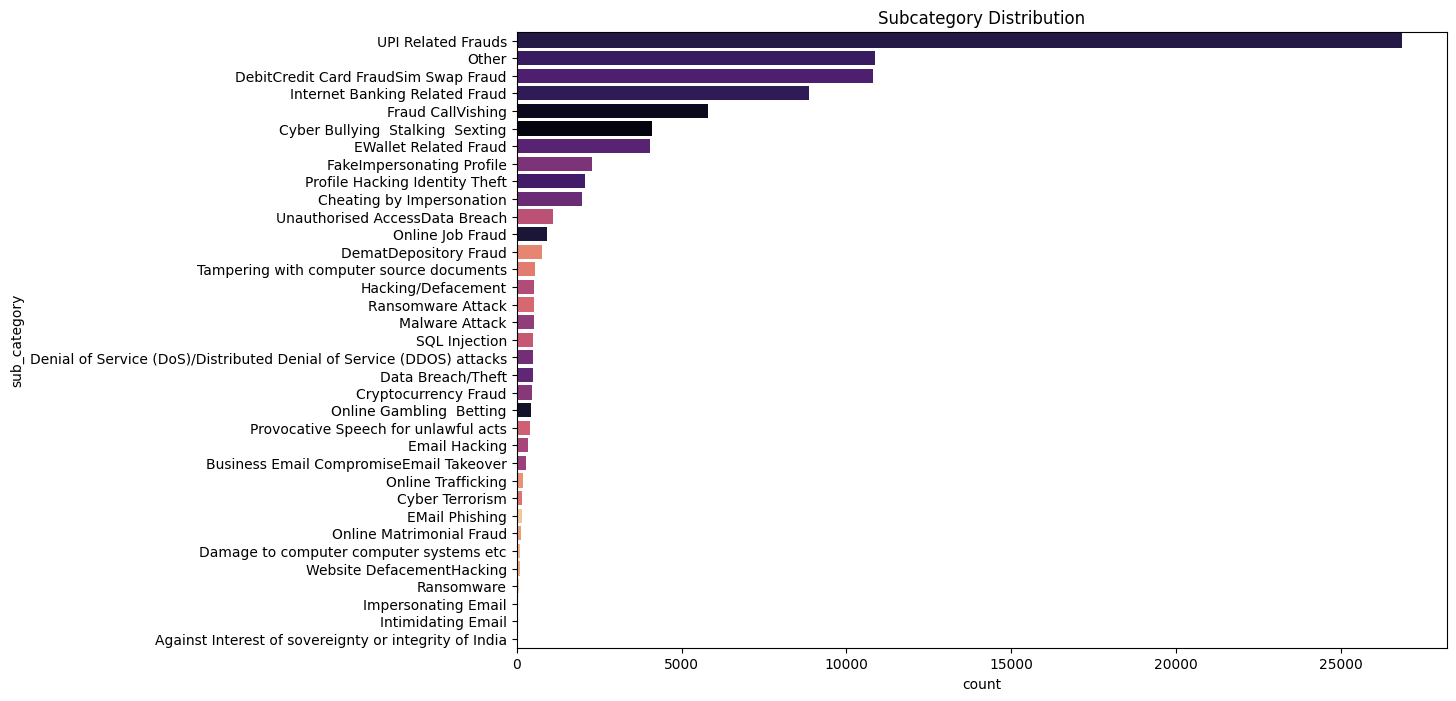

In [93]:

# 3. Class Distribution for Category and Subcategory

# Category distribution
print("\nCategory Distribution:")
print(train_df['category'].value_counts())

# Plotting the category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='category', order=train_df['category'].value_counts().index,hue='category', palette="viridis",legend=False)
plt.title("Category Distribution")
plt.xticks(rotation=45,ha='right')
plt.show()

# Subcategory distribution
print("\nSubcategory Distribution:")
print(train_df['sub_category'].value_counts())

# Plotting the subcategory distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, y='sub_category', order=train_df['sub_category'].value_counts().index,hue='sub_category', palette="magma",legend=False)
plt.title("Subcategory Distribution")
plt.show()


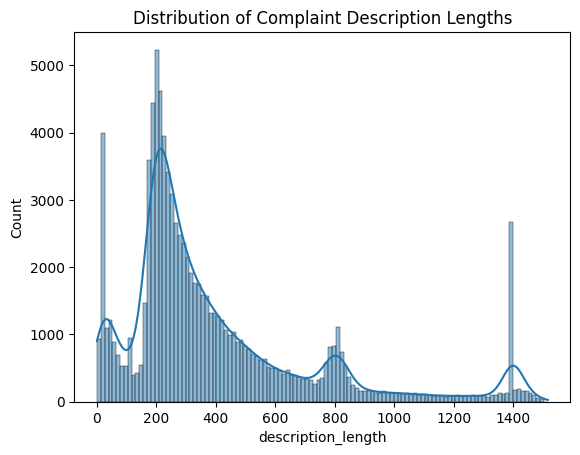

In [94]:
#Text Length Analysis

train_df['crimeaditionalinfo'] =train_df['crimeaditionalinfo'].fillna('')

train_df['description_length'] = train_df['crimeaditionalinfo'].apply(len)
sns.histplot(train_df['description_length'], kde=True)
plt.title("Distribution of Complaint Description Lengths")
plt.show()


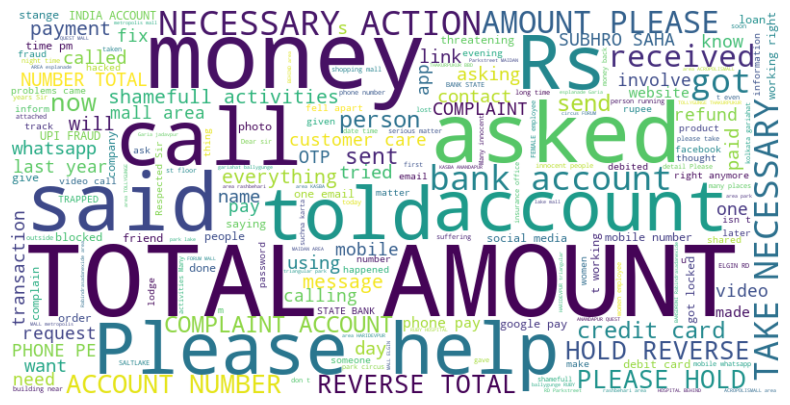

In [95]:
#Common Words Analysis
from wordcloud import WordCloud
text = ' '.join(train_df['crimeaditionalinfo'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


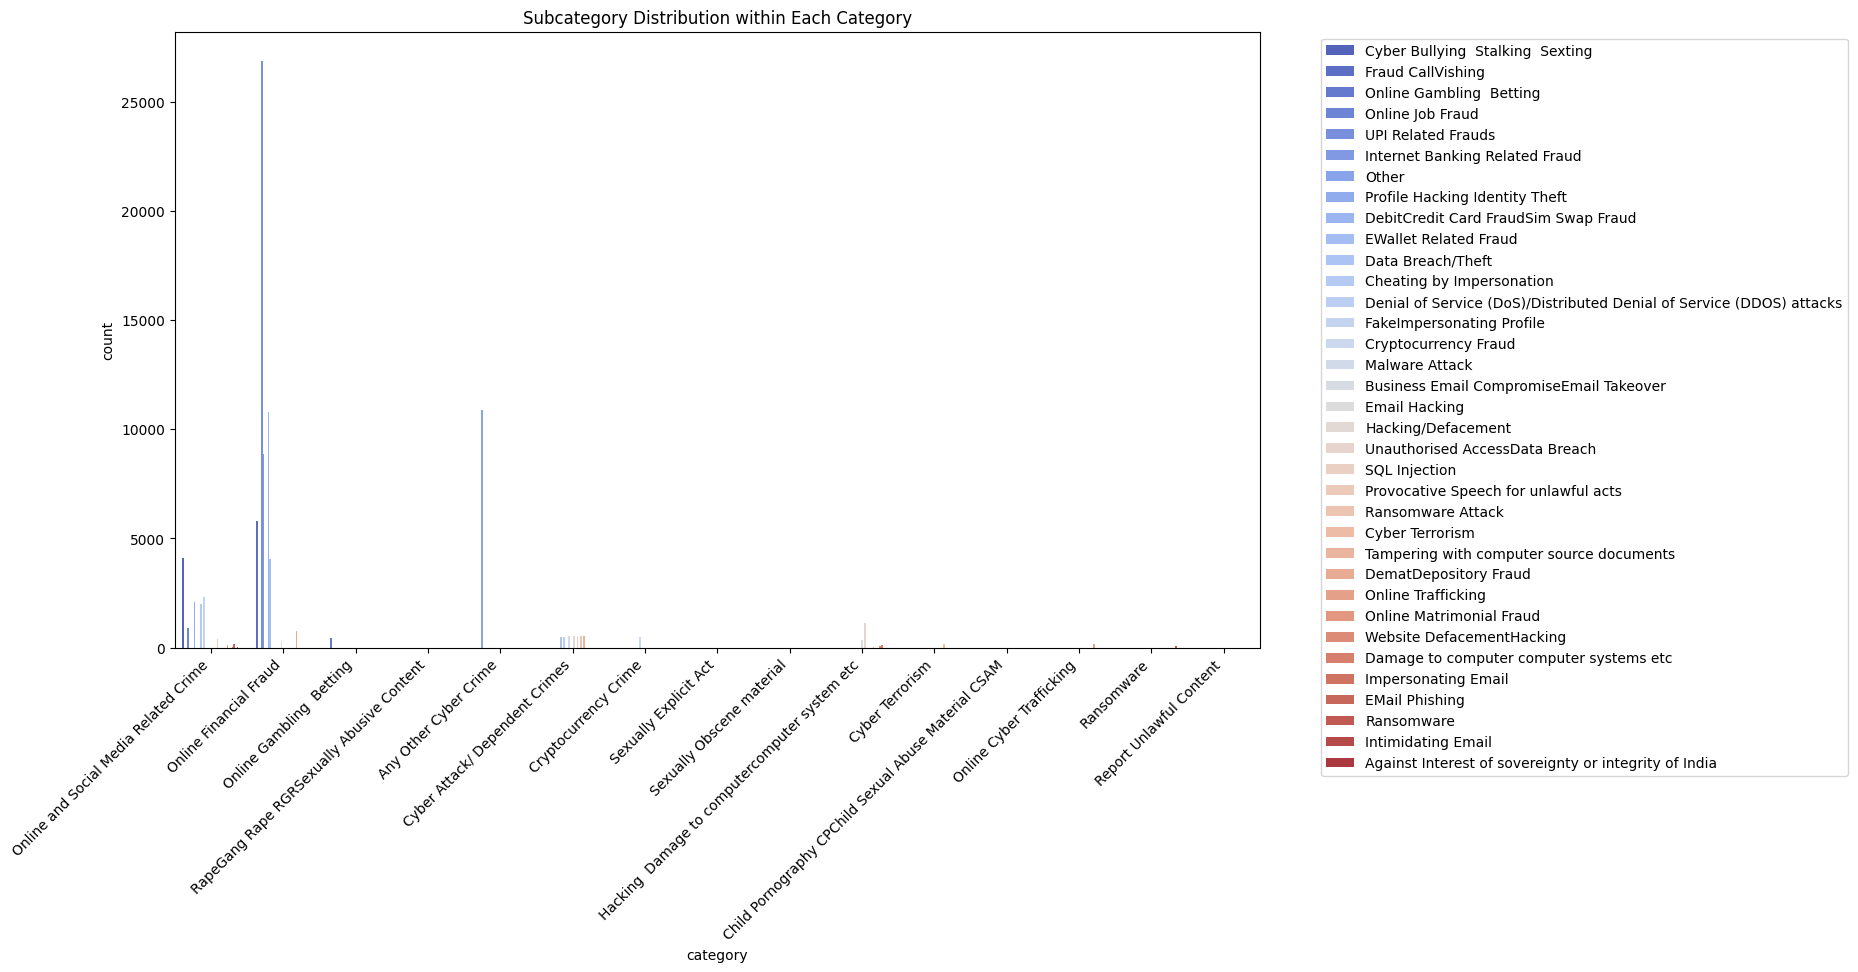

In [96]:
#Relationship Between category and subcategory
plt.figure(figsize=(14, 8))
sns.countplot(data=train_df, x='category', hue='sub_category', palette="coolwarm")
plt.title("Subcategory Distribution within Each Category")
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [97]:
#Optional (not required actaully)

In [98]:
#Sentiment Analysis
# from textblob import TextBlob
# train_df['sentiment'] = train_df['crimeaditionalinfo'].apply(lambda x: TextBlob(x).sentiment.polarity)
# sns.histplot(train_df['sentiment'], kde=True)
# plt.title("Sentiment Distribution of Complaint Descriptions")
# plt.show()


In [99]:
#Category/Subcategory vs. Sentiment:
# category_sentiment = train_df.groupby('category')['sentiment'].mean().sort_values()
# subcategory_sentiment = train_df.groupby('sub_category')['sentiment'].mean().sort_values()

# plt.figure(figsize=(10, 6))
# sns.barplot(x=category_sentiment.index, y=category_sentiment.values,hue=category_sentiment.index ,palette="coolwarm",legend=False)
# plt.title("Average Sentiment by Category")
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(10, 10))
# sns.barplot(y=subcategory_sentiment.index, x=subcategory_sentiment.values,hue=subcategory_sentiment.values, palette="coolwarm",legend=False)
# plt.title("Average Sentiment by Subcategory")
# plt.show()


In [100]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Example for bigrams
# vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
# ngrams = vectorizer.fit_transform(train_df['crimeaditionalinfo'].fillna(''))
# ngram_counts = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
# ngram_counts.columns = ['Count']
# ngram_counts = ngram_counts.sort_values(by='Count', ascending=False).head(10)

# plt.figure(figsize=(10, 5))
# sns.barplot(x=ngram_counts['Count'], y=ngram_counts.index,hue=ngram_counts['Count'] ,palette="viridis",legend=False)
# plt.title("Top 10 Most Common Bigrams in Complaints")
# plt.show()
